<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/relu_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 - CNN1 (1번의미 뭐야) 주석최대한 생략

- 2 Con2d layers
- 1 Fully Connected Network layer
- 1 Output layer

In [1]:
import numpy as np 
import tensorflow as tf
seed = 2021 # 
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리

In [2]:
# 배열 늘려서 가져오는 셋. 처음엔 y로 그후 Y 로 체크체크

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# 왜 4차원으로 체크체크?
# 3차원 데이터를 4차원으로 (데이터는 2차원을 3차원으로)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## 모델 정의, 설정, 학습 , 평가

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten   # 새로 들어와!
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),                    #컴마주의 
    Dense(512, activation='relu'),  # 노드 갑자기 512?
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [10]:
# 모델 최적화를 위한 설정
modelpath = 'best_mnist_cnn_1.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=10)

In [11]:
# 모델 학습 #와우 13번만에. 그럼 3에서 저장하고 10번 견뎠단 말이네?
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=50, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.05037, saving model to best_mnist_cnn_1.h5

Epoch 00002: val_loss did not improve from 0.05037

Epoch 00003: val_loss improved from 0.05037 to 0.04602, saving model to best_mnist_cnn_1.h5

Epoch 00004: val_loss did not improve from 0.04602

Epoch 00005: val_loss did not improve from 0.04602

Epoch 00006: val_loss did not improve from 0.04602

Epoch 00007: val_loss did not improve from 0.04602

Epoch 00008: val_loss did not improve from 0.04602

Epoch 00009: val_loss did not improve from 0.04602

Epoch 00010: val_loss did not improve from 0.04602

Epoch 00011: val_loss did not improve from 0.04602

Epoch 00012: val_loss did not improve from 0.04602

Epoch 00013: val_loss did not improve from 0.04602


In [12]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)
# 성능봐봐. 오차3%, 정확도 98.9%에 육박

313/313 [==============================] - 17s 54ms/step - loss: 0.0333 - accuracy: 0.9893


[0.03334248065948486, 0.989300012588501]

## 학습과정 시각화 - 정확도에 대해
 - 3번 수행하고 최고 정확도라서, 시각화의 의미 따로 없어 수치도 1이하들.
 acc. 그리고 val_loss 에 대해 보는게 맞나?

In [16]:
import matplotlib.pyplot as plt

In [13]:
y_vloss = hist.history['val_loss']
y_acc = hist.history['accuracy']
x_len = np.arange(len(y_acc))

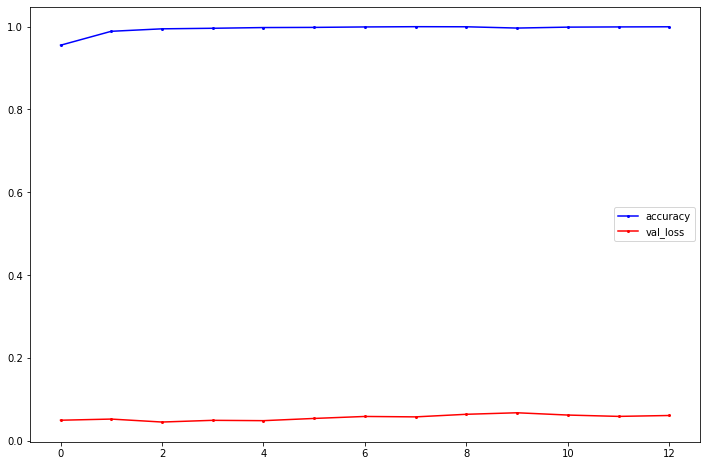

In [17]:

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()